In [3]:
%load_ext autoreload
%autoreload 2

import pickle

import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
"""
This script is used to retrieve data regarding ECE from existing experiments
"""

filenames = [
"../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250405_032919.pkl",
"../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Neural Network__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl",
"../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Logistic Regression__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl",
"../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Random Forest__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl",
"../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__SVM__Exclamation Mark Dataset Family__AbsoluteValues__20250408_001836.pkl",
"../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__Neural Network__Exclamation Mark Dataset Family__AbsoluteValues__20250408_234908.pkl",
"../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__Logistic Regression__Exclamation Mark Dataset Family__AbsoluteValues__20250408_234908.pkl",
"../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__Random Forest__Exclamation Mark Dataset Family__AbsoluteValues__20250408_234908.pkl",
]


eces = []
max_errors = []
errors_20000 = []
true_ecess = []
for filename in filenames:
    with (open(filename, 'rb') as file):
        print(filename)
        results = pickle.load(file)

        means = results["Means"]
        ece_means = np.array(means["ECE"])
        true_eces = np.array(means["True ECE Dists (Binned - 15 Bins)"])
        
        eces.append(ece_means)
        true_ecess.append(true_eces)
        max_errors.append(np.max(np.abs(ece_means - true_eces)))
        errors_20000.append(np.abs(ece_means[-1] - true_eces[-1]))


true_ecess = np.array(true_ecess)
eces = np.array(eces)
max_errors = np.array(max_errors)
errors_20000 = np.array(errors_20000)
print(eces.shape)
print(max_errors.shape)
print(errors_20000.shape)

../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250405_032919.pkl
../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Neural Network__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl
../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Logistic Regression__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl
../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__Random Forest__Gummy Worm Dataset Family__AbsoluteValues__20250311_015848.pkl
../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__SVM__Exclamation Mark Dataset Family__AbsoluteValues__20250408_001836.pkl
../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__Neural Network__Exclamation Mark Dataset Family__AbsoluteValues__20250408_234908.pkl
../varying_test_sample_size_dataset_family/data/Exclamation Mark Dataset__Logistic Regression__Exclamation Mark 

In [5]:
print("Average max. Error:", np.mean(max_errors))
print("Average ECE Error 20000 Samples:", np.mean(errors_20000))
print("Average ECE Error 20000 Samples (Relative to max. Error):", np.mean(errors_20000) / np.mean(max_errors))

Average max. Error: 0.044529716149476976
Average ECE Error 20000 Samples: 0.006813935631024833
Average ECE Error 20000 Samples (Relative to max. Error): 0.15301996554731837


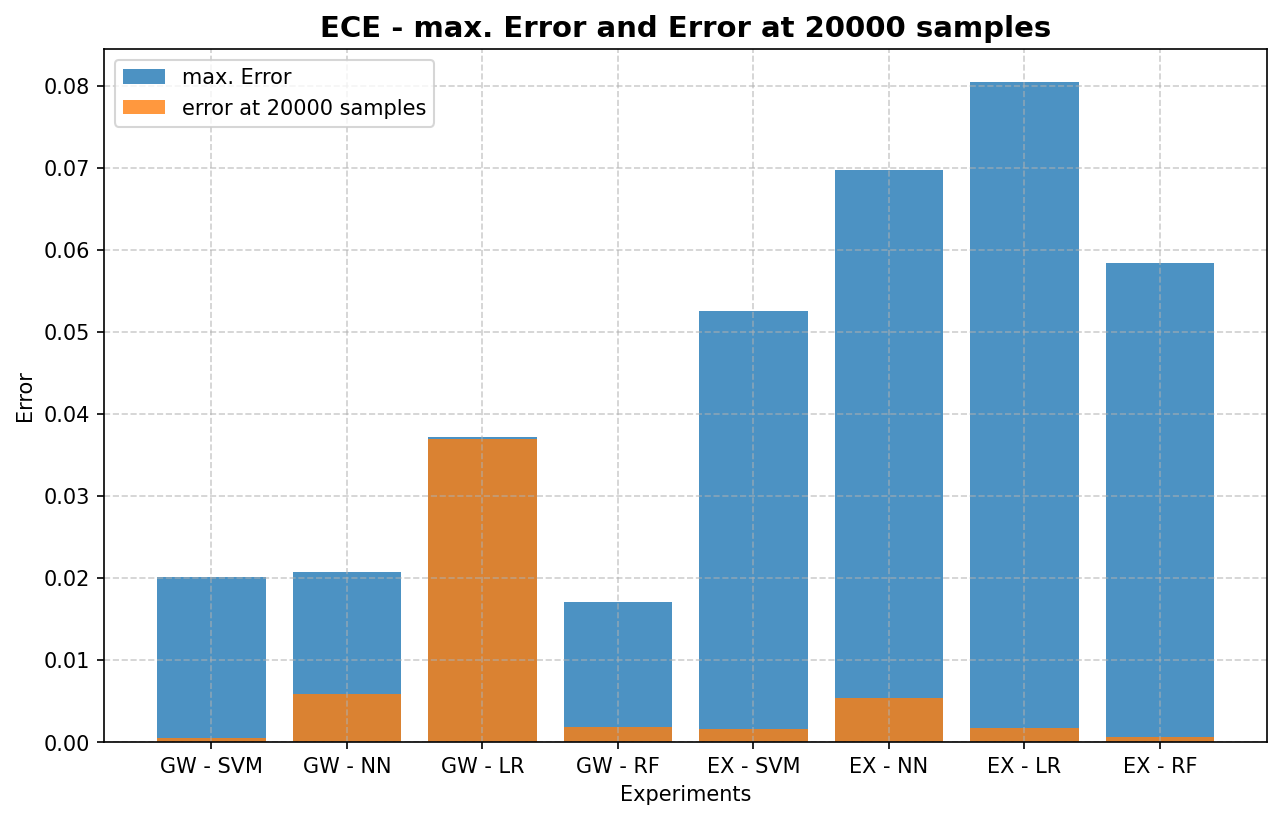

In [10]:
x = ["GW - SVM", "GW - NN", "GW - LR", "GW - RF", "EX - SVM", "EX - NN", "EX - LR", "EX - RF"]

plt.figure(figsize=(10, 6), dpi=150)
plt.bar(x, max_errors, label="max. Error", alpha=0.8)
plt.bar(x, errors_20000, label="error at 20000 samples", alpha=0.8)
plt.xlabel("Experiments")
plt.ylabel("Error")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("ECE - max. Error and Error at 20000 samples", fontsize=14, fontweight="bold")
plt.savefig("./")
plt.show()

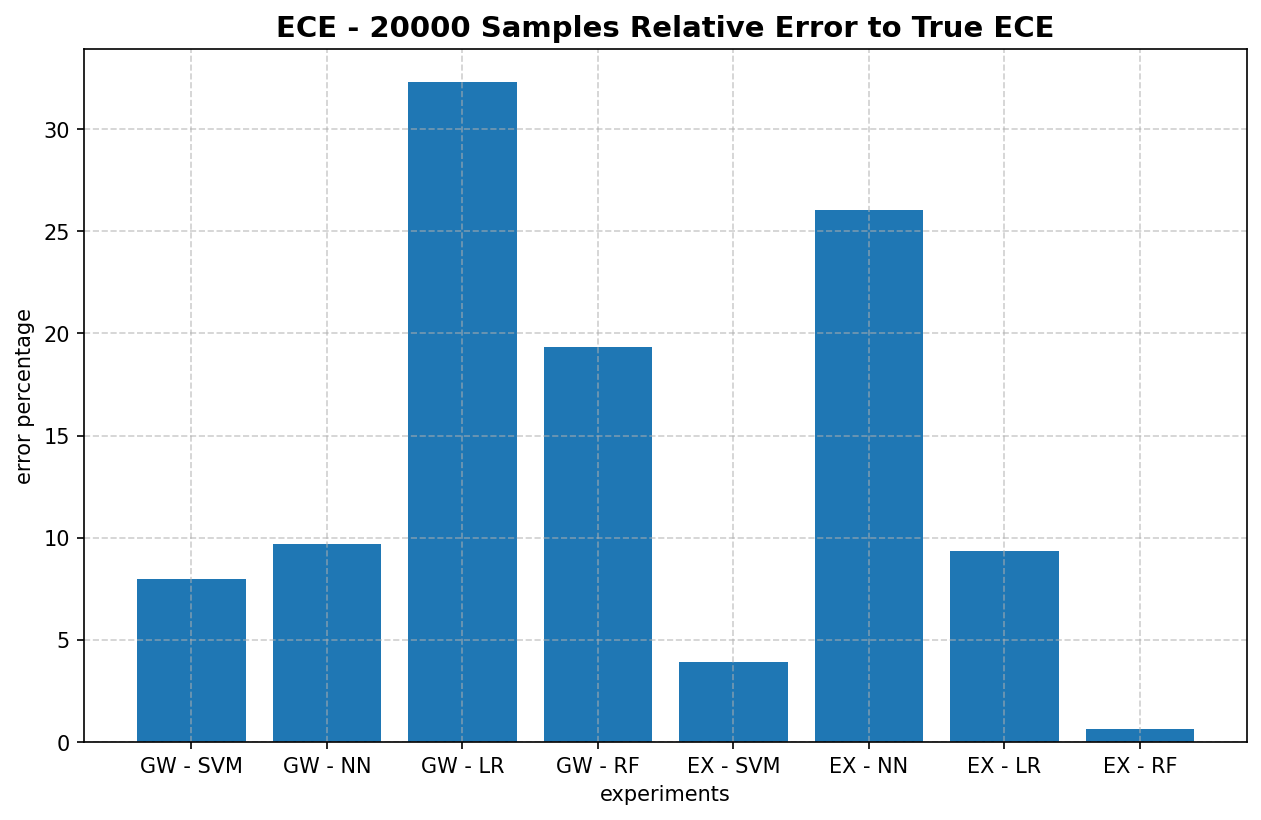

In [11]:
x = ["GW - SVM", "GW - NN", "GW - LR", "GW - RF", "EX - SVM", "EX - NN", "EX - LR", "EX - RF"]

true_eces_20000 = true_ecess[:, -1]
relative_errors = errors_20000 / true_eces_20000

plt.figure(figsize=(10, 6), dpi=150)
plt.bar(x, relative_errors * 100)
plt.xlabel("experiments")
plt.ylabel("error percentage")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("ECE - 20000 Samples Relative Error to True ECE", fontsize=14, fontweight="bold")
plt.savefig("./20000_samples_relative_error_to_true_ece")
plt.show()